In [1]:

#carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt



In [2]:
# se lee el archivo a analizar
df_invoicepurchase = pd.read_csv("DataSet/InvoicePurchases12312016.csv")


In [3]:
#se muestran las primeras 5 filas para comprobar la carga de datos
df_invoicepurchase.head()


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [4]:
#Verificación de la cantidad de filas y columnas
np.shape(df_invoicepurchase)

(5543, 10)

In [5]:
# Verificar si hay filas duplicadas
duplicated_rows = df_invoicepurchase.duplicated()

# Contar el número de filas duplicadas
num_duplicated_rows = duplicated_rows.sum()

# Mostrar el número de filas duplicadas
print(f'Número de filas duplicadas en df_invoicepurchase: {num_duplicated_rows}')


Número de filas duplicadas en df_invoicepurchase: 0


In [6]:
# Reemplazar los valores NaN en la columna 'Approval' con 'No Aplica'
df_invoicepurchase['Approval'] = df_invoicepurchase['Approval'].fillna('No Aplica')

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(df_invoicepurchase.head())


   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight   Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47  No Aplica  
1  2015-12-22  2016-02-21        15     140.55     8.57  No Aplica  
2  2015-12-24  2016-02-16         5     106.60     4.61  No Aplica  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20  No Aplica  
4  2015-12-24  2016-02-12      1935   15527.25   429.20  No Aplica  


In [7]:
# se verifica el tipo de dato de cada columna
print(df_invoicepurchase.dtypes)

VendorNumber      int64
VendorName       object
InvoiceDate      object
PONumber          int64
PODate           object
PayDate          object
Quantity          int64
Dollars         float64
Freight         float64
Approval         object
dtype: object


In [8]:
#Verificamos la cantidad de datos faltantes por columna

print(df_invoicepurchase.isnull().sum())

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64


In [9]:
# Reemplazar los valores NaN en la columna 'Approval' con 'No Aplica'
df_invoicepurchase['Approval'] = df_invoicepurchase['Approval'].fillna('No Aplica')

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(df_invoicepurchase.head())


   VendorNumber                   VendorName InvoiceDate  PONumber  \
0           105  ALTAMAR BRANDS LLC           2016-01-04      8124   
1          4466  AMERICAN VINTAGE BEVERAGE    2016-01-07      8137   
2           388  ATLANTIC IMPORTING COMPANY   2016-01-09      8169   
3           480  BACARDI USA INC              2016-01-12      8106   
4           516  BANFI PRODUCTS CORP          2016-01-07      8170   

       PODate     PayDate  Quantity    Dollars  Freight   Approval  
0  2015-12-21  2016-02-16         6     214.26     3.47  No Aplica  
1  2015-12-22  2016-02-21        15     140.55     8.57  No Aplica  
2  2015-12-24  2016-02-16         5     106.60     4.61  No Aplica  
3  2015-12-20  2016-02-05     10100  137483.78  2935.20  No Aplica  
4  2015-12-24  2016-02-12      1935   15527.25   429.20  No Aplica  


In [10]:
# Verificar si hay valores negativos en las columnas numéricas
negatives = df_invoicepurchase.select_dtypes(include=['number']) < 0

# Obtener los nombres de las columnas que tienen valores negativos
negative_columns = negatives.any()

# Filtrar las columnas que tienen al menos un valor negativo
columns_with_negatives = negative_columns[negative_columns].index.tolist()

# Mostrar los resultados
if columns_with_negatives:
    print(f"Columnas con valores negativos: {columns_with_negatives}")
    for column in columns_with_negatives:
        print(f"\nValores negativos en la columna '{column}':")
        print(df_invoicepurchase[df_invoicepurchase[column] < 0])
else:
    print("No hay valores negativos en el DataFrame.")

No hay valores negativos en el DataFrame.


In [11]:
#Analizamos las columnas
for i in df_invoicepurchase.columns:
    print(i)
    print(df_invoicepurchase[i].describe()) #descripcion basica 
    print('--------------------------------------')

VendorNumber
count      5543.00000
mean      20662.75212
std       34582.15841
min           2.00000
25%        3089.00000
50%        7240.00000
75%       10754.00000
max      201359.00000
Name: VendorNumber, dtype: float64
--------------------------------------
VendorName
count                            5543
unique                            129
top       MHW LTD                    
freq                               55
Name: VendorName, dtype: object
--------------------------------------
InvoiceDate
count           5543
unique           373
top       2016-07-04
freq              43
Name: InvoiceDate, dtype: object
--------------------------------------
PONumber
count     5543.000000
mean     10889.419087
std       1600.859969
min       8106.000000
25%       9503.500000
50%      10890.000000
75%      12275.500000
max      13661.000000
Name: PONumber, dtype: float64
--------------------------------------
PODate
count           5543
unique           319
top       2016-06-25
freq      

hay una gran variedad de proveedores (129 únicos), MHW LTD es el proveedor más frecuente, lo que podría indicar una relación más fuerte o frecuente con este proveedor en particular.

La dispersión de las fechas de las facturas sugiere que las compras se realizaron durante un periodo amplio de tiempo. La fecha más frecuente, 2016-07-04, podría haber sido un día de compras masivas o una fecha clave para la empresa.

In [12]:
# Analizamos las columnas con datos flotantes
# Lista de columnas de tipo flotante
columns_of_interest = ['VendorNumber','PONumber','Quantity','Dollars','Freight']

# Función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")

# Iterar sobre las columnas de interés y mostrar las estadísticas
for column in columns_of_interest:
    print_column_stats(df_invoicepurchase, column)



Estadísticas para la columna 'VendorNumber':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 126
Valor más frecuente (top): 4425
Frecuencia del valor más frecuente (freq): 82
Valor mínimo: 2.0
Valor máximo: 201359.0
Media: 20662.752119790726

Estadísticas para la columna 'PONumber':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 5543
Valor más frecuente (top): 8106
Frecuencia del valor más frecuente (freq): 1
Valor mínimo: 8106.0
Valor máximo: 13661.0
Media: 10889.41908713693

Estadísticas para la columna 'Quantity':
Número total de valores (incluyendo nulos): 5543
Número total de valores: 5543.0
Número de valores únicos: 2895
Valor más frecuente (top): 12
Frecuencia del valor más frecuente (freq): 228
Valor mínimo: 1.0
Valor máximo: 141660.0
Media: 6058.880930903842

Estadísticas para la columna 'Dollars':
Número total de valores (incluyendo nulos): 5543
Número total

VendorNumber:
Número de valores únicos: 126
Valor más frecuente (top): 4425
Frecuencia del valor más frecuente (freq): 82
Hay 126 proveedores únicos, con el proveedor más común apareciendo 82 veces.

PONumber:
Número total de valores (incluyendo nulos): 5,543
Número total de valores: 5,543
Número de valores únicos: 5,543

Cada orden de compra es única, lo que indica un sistema de numeración sin duplicados. 

Quantity:
Valor más frecuente (top): 12
Frecuencia del valor más frecuente (freq): 228
Valor mínimo: 1.0
Valor máximo: 141,660.0
Media: 6,058.88
La cantidad más común de productos pedidos es 12, apareciendo 228 veces. Sin embargo, la amplia gama de cantidades y una media alta indican que hay pedidos con cantidades muy grandes, lo que podría influir significativamente en la gestión de inventarios.

Dollars:
Número total de valores (incluyendo nulos): 5,543
Número total de valores: 5,543
Número de valores únicos: 5,226
Valor más frecuente (top): 214.26
Frecuencia del valor más frecuente (freq): 22
Valor mínimo: 4.14
Valor máximo: 1,660,435.88
Media: 58,073.38
La amplia gama de valores, desde 4.14 hasta más de 1.6 millones, y una media alta sugieren que hay transacciones de valores muy elevados, posiblemente debido a pedidos grandes o productos caros.

Freight:
Número total de valores (incluyendo nulos): 5,543
Número total de valores: 5,543
Número de valores únicos: 4,052
Valor más frecuente (top): 0.26
Frecuencia del valor más frecuente (freq): 13
Valor mínimo: 0.02
Valor máximo: 8,468.22
Media: 295.95
Los costos de flete muestran una gran variedad de valores únicos, con el más frecuente apareciendo solo 13 veces. La amplia gama de valores y una media de 295.95 indican que los costos de flete pueden variar considerablemente, probablemente dependiendo del tamaño y peso del pedido, así como de la distancia de envío.

Resumen General
Distribución de Proveedores (VendorNumber): La concentración en unos pocos proveedores que manejan muchas transacciones sugiere que la empresa podría beneficiarse de diversificar sus proveedores o renegociar términos con los más frecuentados.
Únicamente Ordenes de Compra (PONumber): La unicidad de los números de órdenes de compra es un indicativo positivo de un sistema bien gestionado.
Variabilidad en Cantidad (Quantity): La alta variabilidad y algunos pedidos muy grandes podrían indicar la necesidad de ajustar las estrategias de inventario y aprovisionamiento.
Altos Valores de Transacción (Dollars): Los valores de transacción extremadamente altos sugieren la presencia de productos o pedidos de alto valor, que podrían requerir una gestión especial.
Diversidad en Costos de Flete (Freight): La amplia variabilidad en los costos de flete sugiere que la optimización de estos costos podría ser una oportunidad para ahorrar dinero.

In [13]:
# Se analiza a que se deben los costos de envios tan altos
# Ordenar el DataFrame por la columna 'Freight' en orden descendente y seleccionar las primeras 20 filas
top_50_freight_rows = df_invoicepurchase.nlargest(50, 'Freight')

# Mostrar las 20 filas con mayor valor en 'Freight' y todas las columnas
print(top_50_freight_rows)


      VendorNumber                   VendorName InvoiceDate  PONumber  \
4728          3960  DIAGEO NORTH AMERICA INC     2016-11-15     12833   
4627          3960  DIAGEO NORTH AMERICA INC     2016-11-12     12771   
2822          3960  DIAGEO NORTH AMERICA INC     2016-07-16     10936   
4521          3960  DIAGEO NORTH AMERICA INC     2016-11-03     12618   
3025          3960  DIAGEO NORTH AMERICA INC     2016-08-01     11191   
4829          3960  DIAGEO NORTH AMERICA INC     2016-11-29     12981   
2125          3960  DIAGEO NORTH AMERICA INC     2016-06-06     10260   
3129          3960  DIAGEO NORTH AMERICA INC     2016-08-03     11300   
5037          3960  DIAGEO NORTH AMERICA INC     2016-12-07     13190   
2924          3960  DIAGEO NORTH AMERICA INC     2016-07-26     11028   
4416          3960  DIAGEO NORTH AMERICA INC     2016-10-25     12579   
5456          3960  DIAGEO NORTH AMERICA INC     2017-01-10     13594   
3631          3960  DIAGEO NORTH AMERICA INC     20

In [14]:
# Filtrar las filas donde 'VendorName' es 'DIAGEO NORTH AMERICA INC'
diageo_rows = df_invoicepurchase[df_invoicepurchase['VendorNumber'] == '3960']

# Mostrar el resultado
print(diageo_rows)


Empty DataFrame
Columns: [VendorNumber, VendorName, InvoiceDate, PONumber, PODate, PayDate, Quantity, Dollars, Freight, Approval]
Index: []


In [15]:
#Verificar si las compras que mas costaron fueron aprobadas por alguien
# Ordenar el DataFrame por la columna 'Dollars' en orden descendente
df_sorted = df_invoicepurchase.sort_values(by='Dollars', ascending=False)

# Seleccionar las primeras 5 filas
top_20_dollars = df_sorted.head(20)

# Seleccionar las columnas especificadas
result = top_20_dollars[['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']]

# Mostrar el resultado
print(result)


      VendorNumber                   VendorName InvoiceDate  PONumber  \
4728          3960  DIAGEO NORTH AMERICA INC     2016-11-15     12833   
4521          3960  DIAGEO NORTH AMERICA INC     2016-11-03     12618   
4627          3960  DIAGEO NORTH AMERICA INC     2016-11-12     12771   
2822          3960  DIAGEO NORTH AMERICA INC     2016-07-16     10936   
3025          3960  DIAGEO NORTH AMERICA INC     2016-08-01     11191   
4829          3960  DIAGEO NORTH AMERICA INC     2016-11-29     12981   
5037          3960  DIAGEO NORTH AMERICA INC     2016-12-07     13190   
5456          3960  DIAGEO NORTH AMERICA INC     2017-01-10     13594   
3129          3960  DIAGEO NORTH AMERICA INC     2016-08-03     11300   
2125          3960  DIAGEO NORTH AMERICA INC     2016-06-06     10260   
1317          3960  DIAGEO NORTH AMERICA INC     2016-04-06      9451   
2924          3960  DIAGEO NORTH AMERICA INC     2016-07-26     11028   
4416          3960  DIAGEO NORTH AMERICA INC     20

se observa que las compras mas altas necesitan autorizacion, y se analiza a partir de que rango se necesita autorizaicon

In [16]:

# Filtrar las filas donde 'Approval' es 'Frank Delahunt' y obtener el valor menor de 'Dollars'
min_dollars_frank_delahunt = df_invoicepurchase[df_invoicepurchase['Approval'] == 'Frank Delahunt']['Dollars'].min()

# Filtrar las filas donde 'Approval' es 'No Aplica' y obtener el valor mayor de 'Dollars'
max_dollars_no_aplica = df_invoicepurchase[df_invoicepurchase['Approval'] == 'No Aplica']['Dollars'].max()

# Mostrar los resultados
print(f"El valor menor de 'Dollars' donde 'Approval' es 'Frank Delahunt': {min_dollars_frank_delahunt}")
print(f"El valor mayor de 'Dollars' donde 'Approval' es 'No Aplica': {max_dollars_no_aplica}")


El valor menor de 'Dollars' donde 'Approval' es 'Frank Delahunt': 250689.87
El valor mayor de 'Dollars' donde 'Approval' es 'No Aplica': 249821.96


se concluye a partir de 250.000 dolares se requiere autorizacion

Top 10 Proveedores Más Frecuentes:
      VendorNumber                   VendorName InvoiceDate  PONumber  \
32           12546  JIM BEAM BRANDS COMPANY      2016-01-06      8142   
34            4692  KOBRAND CORPORATION          2016-01-11      8112   
36            4848  LAIRD & CO                   2016-01-07      8143   
37            4950  LATITUDE BEVERAGE COMPANY    2016-01-07      8179   
38            8352  LUXCO INC                    2016-01-08      8113   
...            ...                          ...         ...       ...   
5483          9552  M S WALKER INC               2017-01-06     13562   
5484         10000  MAJESTIC FINE WINES          2017-01-08     13650   
5489          6213  MHW LTD                      2017-01-05     13634   
5520          8664  STOLI GROUP,(USA) LLC        2017-01-06     13623   
5529          9819  TREASURY WINE ESTATES        2017-01-04     13571   

         PODate     PayDate  Quantity    Dollars  Freight        Approval  
32   2015-12

C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2499576850.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_envios.values, y=top_10_envios.index, palette=colors)
C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2499576850.py:36: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_10_envios.values, y=top_10_envios.index, palette=colors)


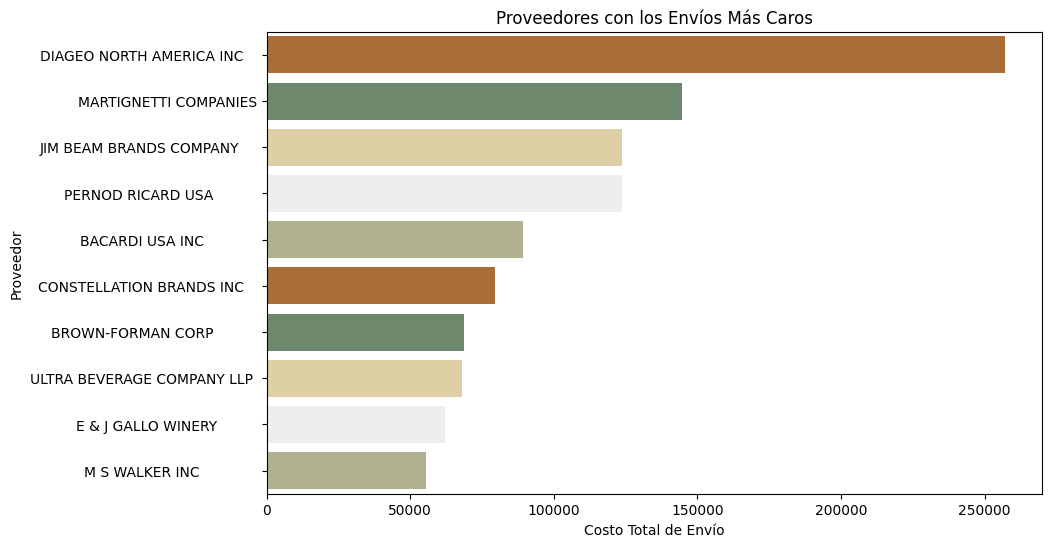

C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2499576850.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)
C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2499576850.py:45: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)


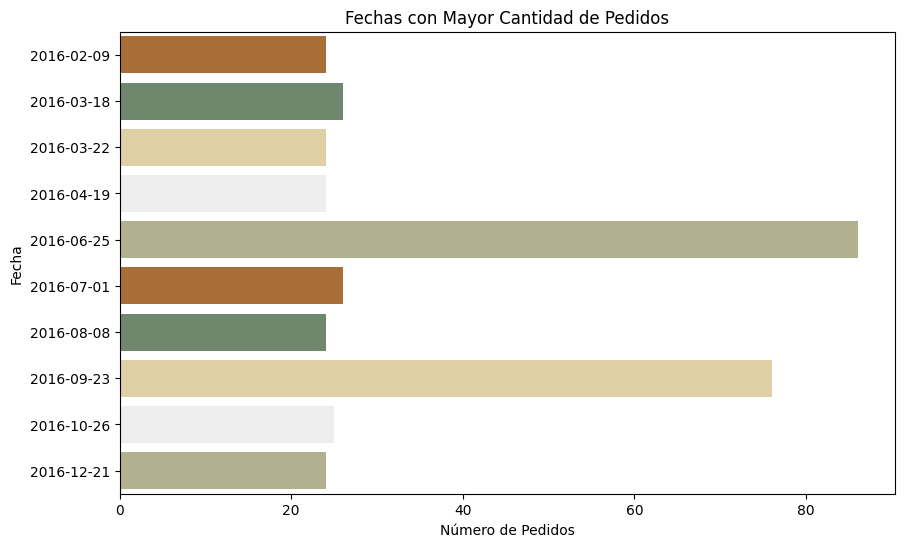

In [17]:

#Se realizan graficos y tablas para la Demo
#  Convertir las fechas a formato datetime para análisis de fechas
df_invoicepurchase['PODate'] = pd.to_datetime(df_invoicepurchase['PODate'])

# Primeros 10 proveedores más frecuentes
top_10_proveedores = df_invoicepurchase['VendorName'].value_counts().head(10)
top_10_proveedores_df = df_invoicepurchase[df_invoicepurchase['VendorName'].isin(top_10_proveedores.index)]

# Primeros 10 productos más demandados (suponiendo que los productos están identificados por 'PONumber')
top_10_productos = df_invoicepurchase['PONumber'].value_counts().head(10)
top_10_productos_df = df_invoicepurchase[df_invoicepurchase['PONumber'].isin(top_10_productos.index)]

# Fechas con mayor cantidad de pedidos
top_10_fechas = df_invoicepurchase['PODate'].value_counts().head(10)
top_10_fechas_df = df_invoicepurchase[df_invoicepurchase['PODate'].isin(top_10_fechas.index)]

# Proveedores con los envíos más caros
top_10_envios = df_invoicepurchase.groupby('VendorName')['Freight'].sum().nlargest(10)
top_10_envios_df = df_invoicepurchase[df_invoicepurchase['VendorName'].isin(top_10_envios.index)]

# Mostrar resultados como tablas
print("Top 10 Proveedores Más Frecuentes:")
print(top_10_proveedores_df)
print("\nTop 10 Productos Más Demandados:")
print(top_10_productos_df)
print("\nFechas con Mayor Cantidad de Pedidos:")
print(top_10_fechas_df)
print("\nProveedores con los Envíos Más Caros:")
print(top_10_envios_df)

# Gama de colores especificada
colors = ['#BC6C25', '#6B8B68', '#E9D39A', '#EEEEEE', '#B8B789']

# Gráfico: Proveedores con los Envíos Más Caros
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_envios.values, y=top_10_envios.index, palette=colors)
plt.title('Proveedores con los Envíos Más Caros')
plt.xlabel('Costo Total de Envío')
plt.ylabel('Proveedor')
plt.show()

# Gráfico: Fechas con Mayor Cantidad de Pedidos
top_10_fechas_sorted = top_10_fechas.sort_index()  # Ordenar por fecha
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)
plt.title('Fechas con Mayor Cantidad de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Fecha')
plt.show()


Tabla: Top 10 Proveedores Más Frecuentes
                     Proveedor  Número de Compras
0  MHW LTD                                     55
1  TREASURY WINE ESTATES                       55
2  JIM BEAM BRANDS COMPANY                     55
3  KOBRAND CORPORATION                         55
4  STOLI GROUP,(USA) LLC                       55
5  LAIRD & CO                                  55
6  LATITUDE BEVERAGE COMPANY                   55
7  LUXCO INC                                   55
8  M S WALKER INC                              55
9  MAJESTIC FINE WINES                         55

Tabla: Top 10 Productos Más Demandados
   Número de Orden de Compra (PONumber)  Número de Compras
0                                  8124                  1
1                                 11803                  1
2                                 11767                  1
3                                 11805                  1
4                                 11744                  1
5              

C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2717767980.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)
C:\Users\danie\AppData\Local\Temp\ipykernel_11372\2717767980.py:26: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)


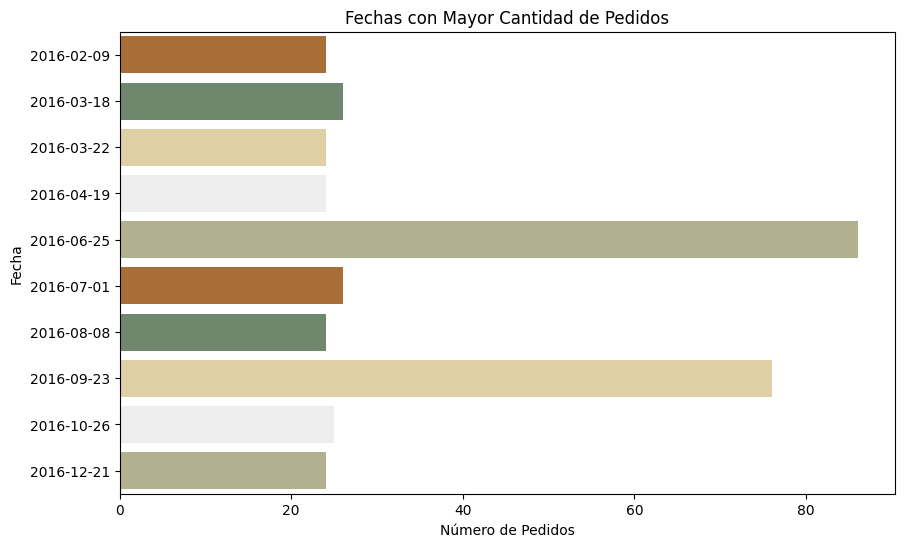

In [18]:

# Convertir las fechas a formato datetime para análisis de fechas
df_invoicepurchase['PODate'] = pd.to_datetime(df_invoicepurchase['PODate'])

# Tabla: Top 10 Proveedores Más Frecuentes
top_10_proveedores = df_invoicepurchase['VendorName'].value_counts().head(10)
tabla_proveedores = top_10_proveedores.reset_index()
tabla_proveedores.columns = ['Proveedor', 'Número de Compras']
print("Tabla: Top 10 Proveedores Más Frecuentes")
print(tabla_proveedores)

# Tabla: Top 10 Productos Más Demandados (suponiendo que los productos están identificados por 'PONumber')
top_10_productos = df_invoicepurchase['PONumber'].value_counts().head(10)
tabla_productos = top_10_productos.reset_index()
tabla_productos.columns = ['Número de Orden de Compra (PONumber)', 'Número de Compras']
print("\nTabla: Top 10 Productos Más Demandados")
print(tabla_productos)

# Gama de colores especificada
colors = ['#BC6C25', '#6B8B68', '#E9D39A', '#EEEEEE', '#B8B789']

# Gráfico: Fechas con Mayor Cantidad de Pedidos
top_10_fechas = df_invoicepurchase['PODate'].dt.date.value_counts().head(10)
top_10_fechas_sorted = top_10_fechas.sort_index()  # Ordenar por fecha

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_fechas_sorted.values, y=top_10_fechas_sorted.index, palette=colors)
plt.title('Fechas con Mayor Cantidad de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Fecha')
plt.show()




In [19]:
#Cambio de nombres de las Columnas 

# Diccionario que mapea los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Proveedor',
    'InvoiceDate': 'Fecha_facturacion',
    'PONumber': 'CompraID',
    'PODate': 'Fecha_compra',
    'PayDate': 'Fecha_pago',
    'Quantity': 'Cantidad',
    'Dollars': 'Precio_total',
    'Freight': 'Costo_envio',
    'Approval': 'Aprobacion'
}

# Renombrar las columnas
df_invoicepurchase.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_invoicepurchase.head())


   ProveedorID                    Proveedor Fecha_facturacion  CompraID  \
0          105  ALTAMAR BRANDS LLC                 2016-01-04      8124   
1         4466  AMERICAN VINTAGE BEVERAGE          2016-01-07      8137   
2          388  ATLANTIC IMPORTING COMPANY         2016-01-09      8169   
3          480  BACARDI USA INC                    2016-01-12      8106   
4          516  BANFI PRODUCTS CORP                2016-01-07      8170   

  Fecha_compra  Fecha_pago  Cantidad  Precio_total  Costo_envio Aprobacion  
0   2015-12-21  2016-02-16         6        214.26         3.47  No Aplica  
1   2015-12-22  2016-02-21        15        140.55         8.57  No Aplica  
2   2015-12-24  2016-02-16         5        106.60         4.61  No Aplica  
3   2015-12-20  2016-02-05     10100     137483.78      2935.20  No Aplica  
4   2015-12-24  2016-02-12      1935      15527.25       429.20  No Aplica  


In [20]:
# Seleccionar las columnas deseadas para crear el archivo final
df_invoicepurchase_final = df_invoicepurchase[['CompraID', 'ProveedorID', 'Fecha_compra', 'Fecha_facturacion', 'Fecha_pago', 'Precio_total', 'Costo_envio', 'Aprobacion']]

In [21]:
# Guardar el resultado en un archivo CSV para revisarlo
df_invoicepurchase_final.to_csv('DataSetFiltrados/COMPRA.csv', index=False)

In [22]:
df_invoicepurchase_final.head()

,CompraID,ProveedorID,Fecha_compra,Fecha_facturacion,Fecha_pago,Precio_total,Costo_envio,Aprobacion
0,8124,105,2015-12-21,2016-01-04,2016-02-16,214.26,3.47,No Aplica
1,8137,4466,2015-12-22,2016-01-07,2016-02-21,140.55,8.57,No Aplica
2,8169,388,2015-12-24,2016-01-09,2016-02-16,106.60,4.61,No Aplica
3,8106,480,2015-12-20,2016-01-12,2016-02-05,137483.78,2935.20,No Aplica
4,8170,516,2015-12-24,2016-01-07,2016-02-12,15527.25,429.20,No Aplica
